In [10]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [11]:
# Importing the dataset
dataset = pd.read_csv('Data_processed.csv')
dataset.head()

,District,State,State No,Population,Confirmed,Active,Recovered,Deceased,Aged
0,Thane,Maharashtra,17,11060148,251880,10009,236285,5527,984353.172
1,Pune,Maharashtra,17,9429408,369065,13639,347678,7713,839217.312
2,Solapur,Maharashtra,17,4317756,52790,1038,49998,1740,384280.284
3,Ludhiana,Punjab,24,3498739,24515,437,23124,954,321883.988
4,Kolhapur,Maharashtra,17,3876001,49049,529,46860,1657,344964.089


In [ ]:
#Ploting boxplot for all columns(for checking potential outliers)
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 9))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sb.boxplot(y=k, data=dataset, ax=axs[index])
    index += 1
plt.plot()

In [ ]:
#Ploting distplot for all columns(for checking the distribution of data and confirm the outliers)
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 9))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sb.distplot(v, ax=axs[index])
    index += 1
plt.plot()

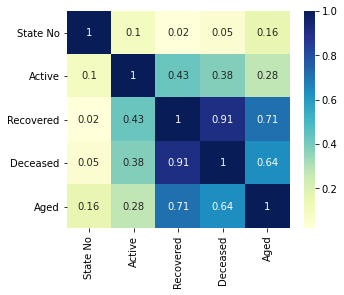

In [15]:
#Ploting heatmap to check correlation
data_corr = dataset.corr().abs().round(2)
plt.figure(figsize = (5,4))
sb.heatmap(data_corr,cmap='YlGnBu',annot=True)

In [13]:
# Drop columns showing multicollinearity(>0.9)
dataset.drop(['District', 'State', 'Confirmed', 'Population'], axis = 1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State No   515 non-null    int64  
 1   Active     515 non-null    int64  
 2   Recovered  515 non-null    int64  
 3   Deceased   515 non-null    int64  
 4   Aged       515 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 20.2 KB


In [16]:
from sklearn.cluster import KMeans
X = dataset.values
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X)
X_sc = scalerX.transform(X)

[]

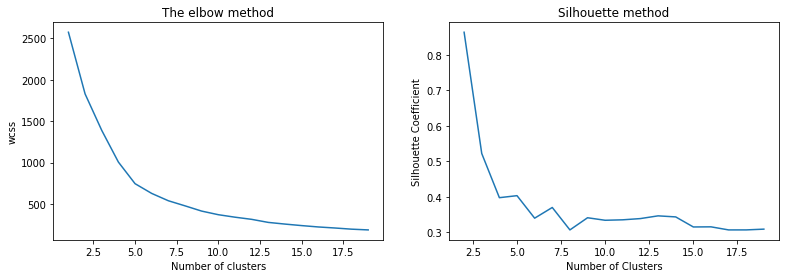

In [17]:
# Elbow method
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_sc)
    wcss.append(kmeans.inertia_)

# Silhouette method
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
    kmeans.fit(X_sc)
    score = silhouette_score(X_sc, kmeans.labels_)
    silhouette_coefficients.append(score)

# Ploting wcss and average silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,4))
ax1.plot(range(1,20),wcss)
ax1.set_title('The elbow method')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel("wcss")
ax1.plot()

ax2.plot(range(2, 20), silhouette_coefficients)
ax2.set_title('Silhouette method')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Coefficient")
ax2.plot()

In [18]:
# Using kmeans clustering(5 clusters)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_sc)
# Reversing the feature scaling
cluster_centers_ = scalerX.inverse_transform(kmeans.cluster_centers_)
# We can categorize each feature distribution according to each cluster by looking at the cluster centroids
# In this way we can define some characteristics for each group.
centroids_data=pd.DataFrame(cluster_centers_, columns=dataset.columns)
centroids_data.head()

,State No,Active,Recovered,Deceased,Aged
0,10.236364,387.523636,5818.418182,74.392727,97552.753433
1,20.333333,8876.666667,266838.000000,5738.666667,745709.877333
2,13.219512,2357.902439,59393.707317,856.048780,325471.802951
3,26.938462,202.907692,8837.558974,127.476923,159112.362523
4,3.000000,34484.000000,15370.000000,149.000000,77744.156000


In [19]:
# Add the predicted cluster as the last column of dataset
y_kmeans_c = y_kmeans[..., None]
Xf = np.c_[X, y_kmeans_c]
df = pd.DataFrame(data =Xf, columns = ['State No', 'Active', 'Recovered', 'Deceased', 'Aged', 'Cluster'])
df.head()
df.to_csv('Clustered_data.csv')

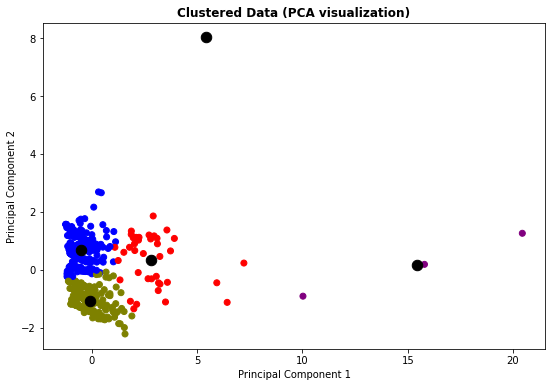

In [20]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)  #controls number of dimension
pca_2_result = pca_2.fit_transform(X_sc)
centroids_pca = pca_2.transform(kmeans.cluster_centers_)

plt.figure(figsize = (9,6))
plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], cmap='brg', c=y_kmeans)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=110, color='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()

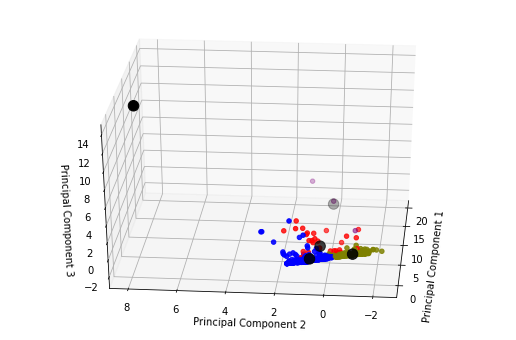

In [21]:
pca_3 = PCA(3)
pca_3_result = pca_3.fit_transform(X_sc)
centroids_pca = pca_3.transform(kmeans.cluster_centers_)

#%matplotlib notebook   #Use for interactive 3dplot in Jupyter
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3_result[:, 0], pca_3_result[:, 1], pca_3_result[:, 2], cmap='brg', c=y_kmeans)
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], s=110, color='black')
ax.view_init(30, 185)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

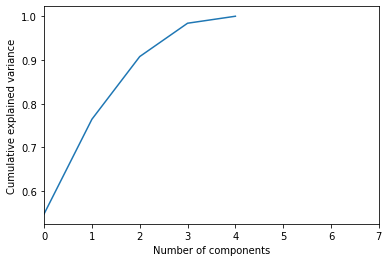

In [22]:
pca = PCA().fit(X_sc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [23]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10)
gmm.fit(X_sc)
labels = gmm.predict(X_sc)
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ['State No', 'Active', 'Recovered', 'Deceased', 'Aged', 'cluster']
frame.head()
#df.to_csv('Clusters3gmm.csv')

,State No,Active,Recovered,Deceased,Aged,cluster
0,17.0,10009.0,236285.0,5527.0,984353.172,6
1,17.0,13639.0,347678.0,7713.0,839217.312,6
2,17.0,1038.0,49998.0,1740.0,384280.284,5
3,24.0,437.0,23124.0,954.0,321883.988,5
4,17.0,529.0,46860.0,1657.0,344964.089,5


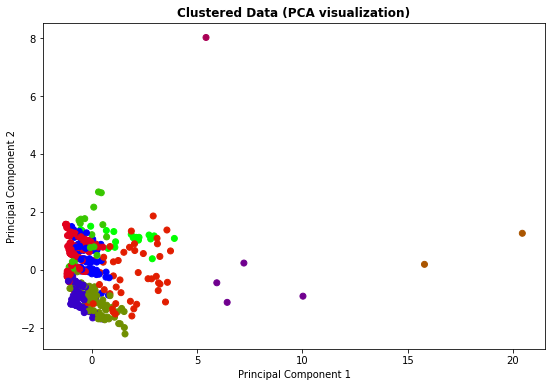

In [24]:
pca_2 = PCA(2)  #controls number of dimension
pca_2_result = pca_2.fit_transform(X_sc)

plt.figure(figsize = (9,6))
plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], cmap='brg', c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()